In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [58]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [59]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [60]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])
df['Drug'] = label_encoder.fit_transform(df['Drug'])

In [62]:
target = df['Drug']
df.drop('Drug', axis = 1, inplace=True)
df

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 0)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


0.7333333333333333


array([[29,  0,  1,  0,  0],
       [ 0,  4,  0,  0,  1],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  4],
       [ 2,  4,  2,  2,  8]])

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape = [5]),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation = 'softmax')
])

In [68]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)

In [69]:
from sklearn.preprocessing import OneHotEncoder

# Assuming Y_train and Y_test are your target labels
encoder = OneHotEncoder(sparse=False)
Y_train_encoded = encoder.fit_transform(Y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/200
9/9 [==============================] - 3s 56ms/step - loss: 1.3737 - accuracy: 0.5357 - val_loss: 1.3844 - val_accuracy: 0.5000
Epoch 2/200
9/9 [==============================] - 0s 16ms/step - loss: 0.9254 - accuracy: 0.6857 - val_loss: 1.3325 - val_accuracy: 0.5000
Epoch 3/200
9/9 [==============================] - 0s 16ms/step - loss: 0.6891 - accuracy: 0.7571 - val_loss: 1.2299 - val_accuracy: 0.5000
Epoch 4/200
9/9 [==============================] - 0s 16ms/step - loss: 0.8045 - accuracy: 0.7286 - val_loss: 1.1840 - val_accuracy: 0.5000
Epoch 5/200
9/9 [==============================] - 0s 16ms/step - loss: 0.5378 - accuracy: 0.8143 - val_loss: 1.1228 - val_accuracy: 0.5000
Epoch 6/200
9/9 [==============================] - 0s 16ms/step - loss: 0.5522 - accuracy: 0.8071 - val_loss: 1.0487 - val_accuracy: 0.5500
Epoch 7/200
9/9 [==============================] - 0s 17ms/step - loss: 0.5812 - accuracy: 0.8429 - val_loss: 0.9832 - val_accuracy: 0.5667
Epoch 8/200
9/9 [===

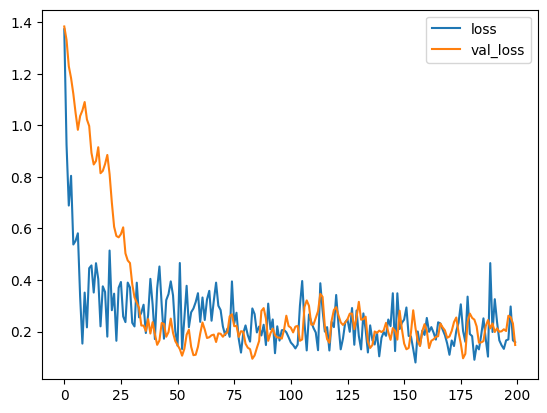

In [70]:
history = model.fit(
    X_train, Y_train_encoded,
    validation_data = (X_test, y_test_encoded),
    batch_size = 16,
    epochs = 200
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))